
# EDA · Saber Pro 2023 — Universidad Mariana · Ingeniería de Sistemas (SNIES 2445)

Este cuaderno realiza un **Análisis Exploratorio de Datos (EDA)** profesional sobre los microdatos de **Saber Pro 2023**, con enfoque exclusivo en los estudiantes de **Universidad Mariana** matriculados en **Ingeniería de Sistemas** (código **SNIES 2445**).

**Objetivo dentro del TFM:** generar la **línea de salida** (desempeño al egreso) que luego se cruzará con la **línea de entrada** (Saber 11) para estimar **Valor Agregado (VA)** y **Contribución Relativa (CR)** del programa.


In [3]:

import os
import unicodedata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog

plt.rcParams.update({
    "figure.figsize": (9, 5),
    "axes.grid": True
})

print("Librerías cargadas correctamente")

Librerías cargadas correctamente



## 1) Selección del archivo de datos

En lugar de fijar un nombre, se abrirá un cuadro de diálogo para seleccionar el archivo TXT de Saber Pro 2020.  
Así evitamos errores de "archivo no encontrado".


In [4]:

# Ruta fija del archivo Saber Pro 2020
file_path = "Examen_Saber_Pro_Genericas_2023.txt"

if not os.path.exists(file_path):
    raise FileNotFoundError(f"No se encontró el archivo en la ruta: {file_path}")

print("Archivo seleccionado:", file_path)

# Columnas de interés
COLS = [
    "estu_inst_departamento","inst_nombre_institucion","inst_cod_institucion","inst_origen","inst_caracter_academico",
    "estu_prgm_academico","estu_snies_prgmacademico","estu_nivel_prgm_academico",
    "estu_depto_presentacion","estu_mcpio_presentacion","estu_zona_presentacion",
    "estu_genero","fami_estratovivienda",
    "estu_horassemanatrabaja","estu_pagomatriculabeca","estu_pagomatriculacredito",
    "estu_pagomatriculapadres","estu_pagomatriculapropio",
    "mod_lectura_critica_punt","mod_razona_cuantitat_punt","mod_comuni_escrita_punt",
    "mod_ingles_punt","mod_competen_ciudada_punt","punt_global","percentil_global",
]

# Lectura del archivo
df = pd.read_csv(file_path, sep=";", encoding="latin1", low_memory=False)
keep = [c for c in COLS if c in df.columns]
df = df[keep].copy()

print("Dimensiones iniciales:", df.shape)
df.head(3)


Archivo seleccionado: Examen_Saber_Pro_Genericas_2023.txt
Dimensiones iniciales: (249096, 24)


,estu_inst_departamento,inst_nombre_institucion,inst_cod_institucion,inst_origen,inst_caracter_academico,estu_prgm_academico,estu_snies_prgmacademico,estu_nivel_prgm_academico,estu_depto_presentacion,estu_mcpio_presentacion,...,estu_pagomatriculacredito,estu_pagomatriculapadres,estu_pagomatriculapropio,mod_lectura_critica_punt,mod_razona_cuantitat_punt,mod_comuni_escrita_punt,mod_ingles_punt,mod_competen_ciudada_punt,punt_global,percentil_global
0,TOLIMA,UNIVERSIDAD DEL TOLIMA-IBAGUE,1207.0,OFICIAL DEPARTAMENTAL,UNIVERSIDAD,INGENIERIA DE SISTEMAS,10228.0,UNIVERSITARIO,TOLIMA,IBAGUÃ,...,NaN,NaN,NaN,134,142,120,169.0,102,133.0,35.0
1,BOGOTÃ,ESCUELA COLOMBIANA DE INGENIERIAJULIO GARAVITO...,2811.0,NO OFICIAL - CORPORACIÃN,INSTITUCIÃN UNIVERSITARIA,INGENIERIA BIOMEDICA,91049.0,UNIVERSITARIO,BOGOTÃ,BOGOTÃ D.C.,...,NaN,NaN,NaN,188,202,139,217.0,189,187.0,97.0
2,QUINDIO,CORPORACION UNIVERSITARIA EMPRESARIAL ALEXANDE...,2840.0,NO OFICIAL - CORPORACIÃN,INSTITUCIÃN UNIVERSITARIA,DERECHO,101747.0,UNIVERSITARIO,QUINDIO,ARMENIA,...,NaN,NaN,NaN,83,143,168,149.0,138,136.0,40.0



## 2) Limpieza y normalización

- Conversión de puntajes a numéricos.  
- Normalización de textos (mayúsculas, sin tildes).  
- Eliminación de duplicados.


In [5]:

# 2.1 Conversión de puntajes
score_cols = ["mod_lectura_critica_punt","mod_razona_cuantitat_punt","mod_comuni_escrita_punt",
              "mod_ingles_punt","mod_competen_ciudada_punt","punt_global","percentil_global"]
for c in score_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# 2.2 Normalización de texto
def norm_text(s: pd.Series) -> pd.Series:
    s = s.astype(str).str.replace("\xa0"," ", regex=False).str.strip()
    s = s.apply(lambda x: "".join(ch for ch in unicodedata.normalize("NFKD", x) if not unicodedata.combining(ch)))
    return s.str.upper()

for c in ["inst_nombre_institucion","estu_prgm_academico","inst_origen",
          "inst_caracter_academico","estu_genero","fami_estratovivienda","estu_inst_departamento",]:
    if c in df.columns:
        df[c] = norm_text(df[c])

# 2.3 Duplicados
before = len(df)
df = df.drop_duplicates()
print("Duplicados eliminados:", before - len(df))
df.info()

Duplicados eliminados: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249096 entries, 0 to 249095
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   estu_inst_departamento     249096 non-null  object 
 1   inst_nombre_institucion    249096 non-null  object 
 2   inst_cod_institucion       242176 non-null  float64
 3   inst_origen                249096 non-null  object 
 4   inst_caracter_academico    249096 non-null  object 
 5   estu_prgm_academico        249096 non-null  object 
 6   estu_snies_prgmacademico   242176 non-null  float64
 7   estu_nivel_prgm_academico  242140 non-null  object 
 8   estu_depto_presentacion    249060 non-null  object 
 9   estu_mcpio_presentacion    249060 non-null  object 
 10  estu_genero                249096 non-null  object 
 11  fami_estratovivienda       249096 non-null  object 
 12  estu_horassemanatrabaja    242127 non-null  object 
 13  estu


## 3) Filtro del universo de análisis

Se seleccionan únicamente estudiantes de **Universidad Mariana** y del programa **Ingeniería de Sistemas (SNIES 2445)**.


In [6]:

# Filtro por SNIES si está disponible
mask_snies = False
if "estu_snies_prgmacademico" in df.columns:
    mask_snies = df["estu_snies_prgmacademico"].astype(str).str.strip() == "2445"

# Filtro por nombre (respaldo)
inst_ok = df.get("inst_nombre_institucion", pd.Series(dtype=str)).str.contains("UNIVERSIDAD MARIANA", na=False)
prog_ok = df.get("estu_prgm_academico", pd.Series(dtype=str)).str.contains("INGENIER", na=False) &           df.get("estu_prgm_academico", pd.Series(dtype=str)).str.contains("SISTEM", na=False)

if isinstance(mask_snies, pd.Series) and mask_snies.any():
    df_mariana = df[mask_snies].copy()
else:
    df_mariana = df[inst_ok & prog_ok].copy()

print("Filas tras filtro (Mariana · Ing. Sistemas):", df_mariana.shape)
df_mariana.head(3)

Filas tras filtro (Mariana · Ing. Sistemas): (28, 24)


,estu_inst_departamento,inst_nombre_institucion,inst_cod_institucion,inst_origen,inst_caracter_academico,estu_prgm_academico,estu_snies_prgmacademico,estu_nivel_prgm_academico,estu_depto_presentacion,estu_mcpio_presentacion,...,estu_pagomatriculacredito,estu_pagomatriculapadres,estu_pagomatriculapropio,mod_lectura_critica_punt,mod_razona_cuantitat_punt,mod_comuni_escrita_punt,mod_ingles_punt,mod_competen_ciudada_punt,punt_global,percentil_global
147671,NARIAO,UNIVERSIDAD MARIANA-PASTO,1720.0,NO OFICIAL - FUNDACIAN,UNIVERSIDAD,INGENIERIA DE SISTEMAS,2445.0,UNIVERSITARIO,NARIÃO,PASTO,...,No,Si,No,215,178,300,300.0,159,230.0,100.0
159339,NARIAO,UNIVERSIDAD MARIANA-PASTO,1720.0,NO OFICIAL - FUNDACIAN,UNIVERSIDAD,INGENIERIA DE SISTEMAS,2445.0,UNIVERSITARIO,NARIÃO,PASTO,...,No,Si,Si,166,162,134,161.0,184,161.0,72.0
160440,NARIAO,UNIVERSIDAD MARIANA-PASTO,1720.0,NO OFICIAL - FUNDACIAN,UNIVERSIDAD,INGENIERIA DE SISTEMAS,2445.0,UNIVERSITARIO,NARIÃO,PASTO,...,No,Si,No,152,174,172,158.0,143,160.0,70.0



## 4) Chequeos de calidad de puntajes


In [7]:

# Nulos
nulls = df_mariana[score_cols].isna().mean().sort_values(ascending=False).to_frame("pct_null")
display((nulls*100).round(2))

# Rango de puntajes
rng = pd.DataFrame({"min": df_mariana[score_cols].min(), "max": df_mariana[score_cols].max()})
display(rng)

,pct_null
mod_lectura_critica_punt,0.0
mod_razona_cuantitat_punt,0.0
mod_comuni_escrita_punt,0.0
mod_ingles_punt,0.0
mod_competen_ciudada_punt,0.0
punt_global,0.0
percentil_global,0.0


,min,max
mod_lectura_critica_punt,83.0,215.0
mod_razona_cuantitat_punt,94.0,219.0
mod_comuni_escrita_punt,0.0,300.0
mod_ingles_punt,114.0,300.0
mod_competen_ciudada_punt,89.0,184.0
punt_global,112.0,230.0
percentil_global,8.0,100.0



## 5) Estadísticos descriptivos


In [8]:

desc = df_mariana[score_cols].describe().T
display(desc)

,count,mean,std,min,25%,50%,75%,max
mod_lectura_critica_punt,28.0,148.607143,23.592747,83.0,137.25,152.0,160.00,215.0
mod_razona_cuantitat_punt,28.0,150.250000,27.465298,94.0,129.25,150.5,169.25,219.0
mod_comuni_escrita_punt,28.0,166.250000,59.449091,0.0,143.75,163.0,172.50,300.0
mod_ingles_punt,28.0,162.107143,32.702179,114.0,147.75,159.5,168.25,300.0
mod_competen_ciudada_punt,28.0,138.571429,27.247057,89.0,123.00,138.5,159.00,184.0
punt_global,28.0,153.107143,24.088324,112.0,138.75,154.5,161.50,230.0
percentil_global,28.0,56.571429,25.536363,8.0,38.50,62.5,72.50,100.0



## 6) Perfil sociodemográfico y formas de financiación


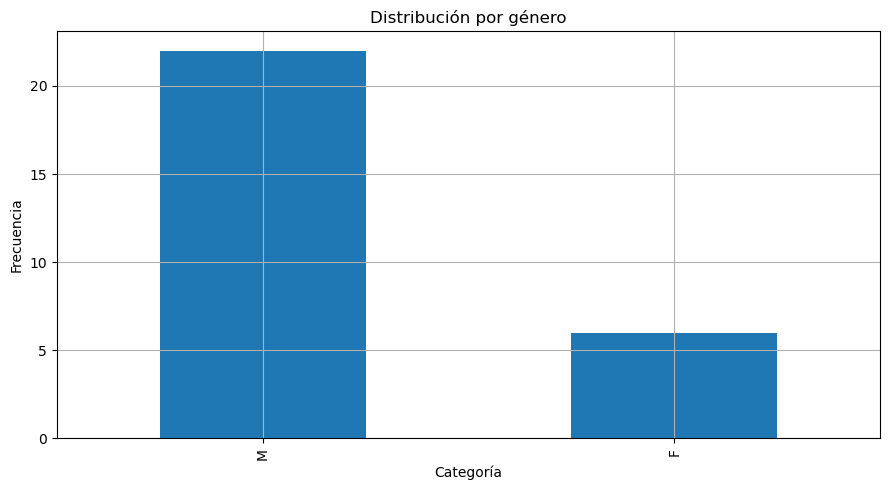

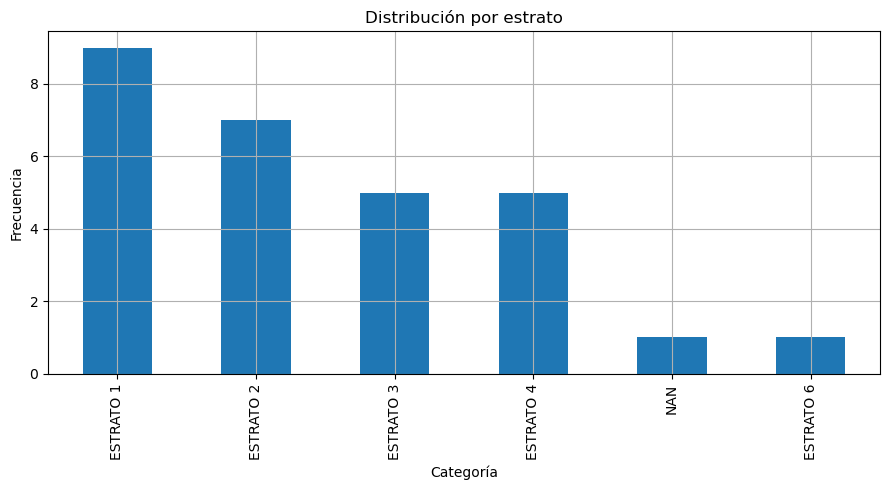

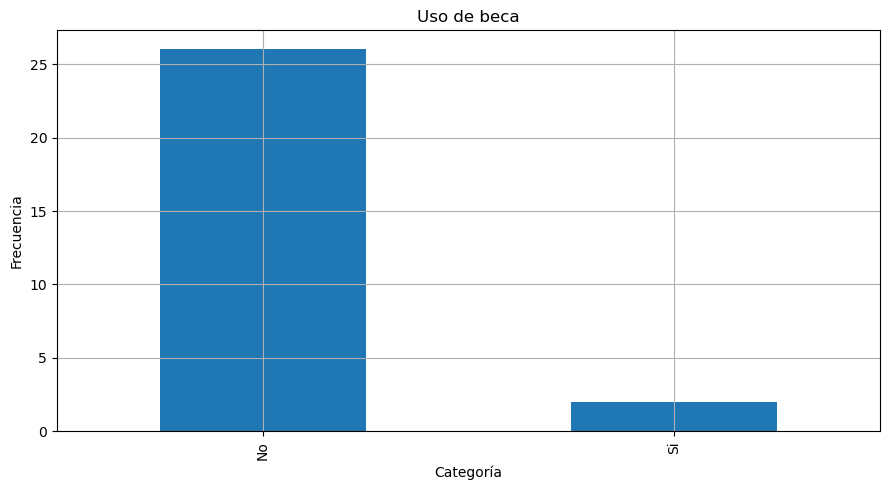

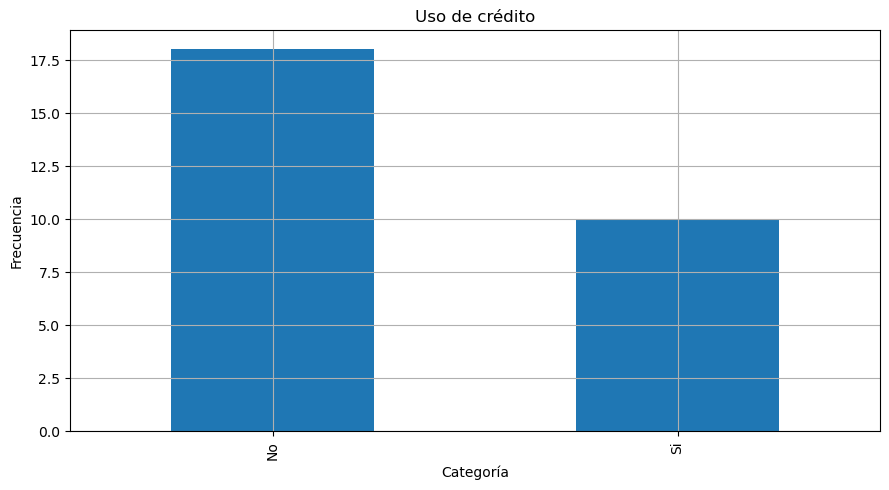

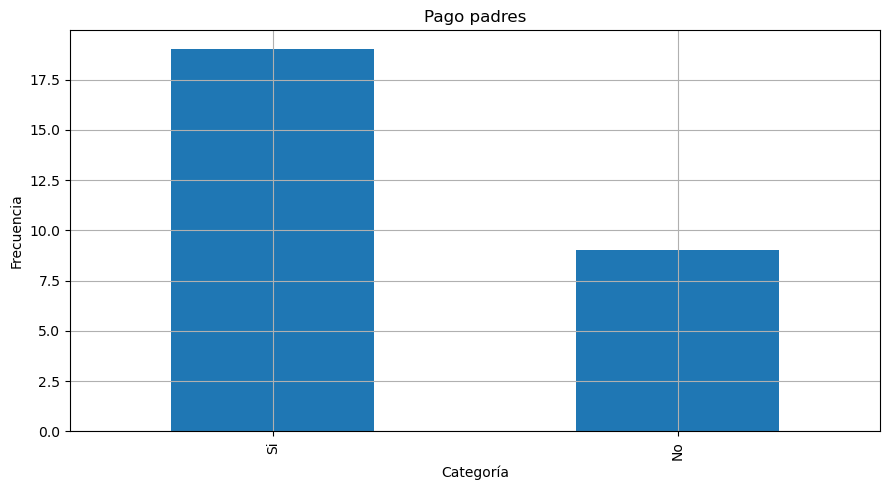

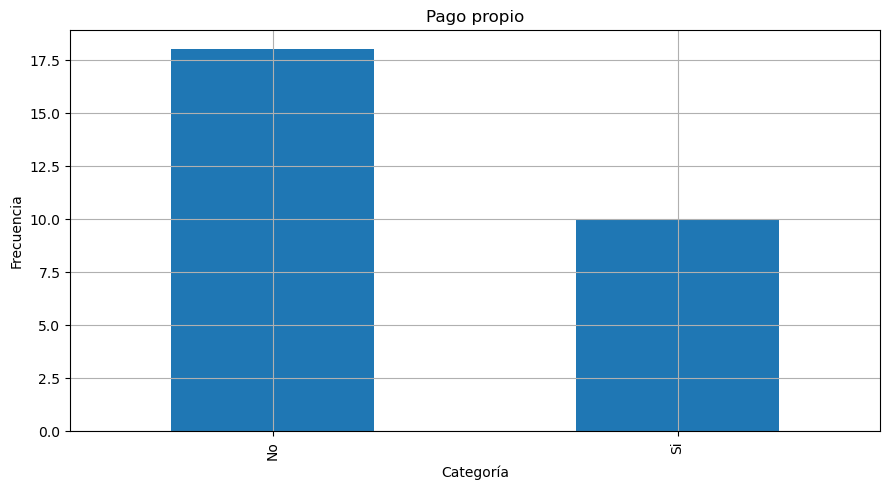

In [9]:

def plot_bar_counts(series, title):
    vc = series.value_counts(dropna=False)
    plt.figure()
    vc.plot(kind="bar")
    plt.title(title)
    plt.xlabel("Categoría")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

if "estu_genero" in df_mariana.columns:
    plot_bar_counts(df_mariana["estu_genero"], "Distribución por género")

if "fami_estratovivienda" in df_mariana.columns:
    plot_bar_counts(df_mariana["fami_estratovivienda"], "Distribución por estrato")

for paycol, title in [("estu_pagomatriculabeca","Uso de beca"),
                      ("estu_pagomatriculacredito","Uso de crédito"),
                      ("estu_pagomatriculapadres","Pago padres"),
                      ("estu_pagomatriculapropio","Pago propio")]:
    if paycol in df_mariana.columns:
        plot_bar_counts(df_mariana[paycol], f"{title}")

### Resultados — Año 2023

En la distribución por género, se mantiene una marcada mayoría masculina frente a la femenina. Aunque se observa un ligero aumento de participación femenina en comparación con años previos, la diferencia sigue siendo considerable, lo que indica que la brecha de género en la matrícula aún persiste.

Respecto a la distribución por estrato, los datos muestran que el **estrato 1** se convierte en el más representativo, seguido por los estratos 2 y 3 en proporciones similares, mientras que el estrato 4 presenta una menor frecuencia. Adicionalmente, se observan casos aislados en estrato 6 y valores no clasificados (NaN). Esto refuerza la idea de que la población estudiantil continúa proveniente mayoritariamente de contextos socioeconómicos bajos, aunque con una distribución un poco más diversa que en años anteriores.

En cuanto al acceso a becas, la situación no cambia de manera significativa: la gran mayoría de estudiantes no cuenta con este beneficio y solo una proporción mínima accede a algún tipo de apoyo. Esto evidencia que las becas siguen siendo una herramienta poco extendida dentro de la cohorte.

En lo referente al uso de crédito educativo, se aprecia un patrón similar al de años anteriores: aunque una parte de los estudiantes recurre al crédito, la mayoría no lo hace, lo que confirma que este mecanismo continúa siendo una opción secundaria en el financiamiento de la educación superior.

En el análisis de las formas de pago, se reafirma que los padres siguen siendo los principales responsables del sostenimiento económico, con una mayoría que declara depender de este recurso. El pago propio, aunque mantiene cierta presencia, sigue siendo minoritario, reflejando que pocos estudiantes tienen la capacidad de asumir directamente los costos de sus estudios.

En síntesis, los resultados del año 2023 confirman la continuidad de las tendencias observadas en los años anteriores: predominio masculino en la matrícula, concentración en estratos socioeconómicos bajos, bajo acceso a becas, uso moderado del crédito educativo y fuerte dependencia de los padres como principales financiadores. La principal novedad es que el estrato 1 pasa a ser el más frecuente, lo que podría indicar un aumento en la participación de estudiantes provenientes de sectores más vulnerables.



## 7) Distribución de puntajes


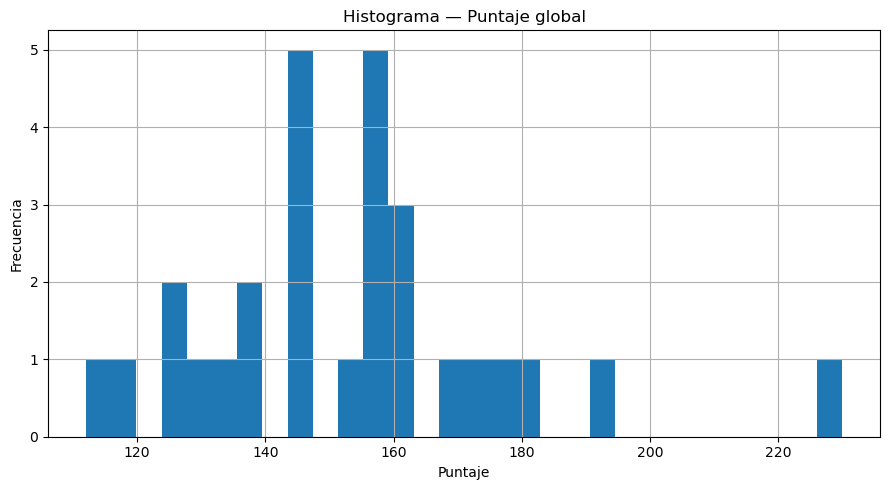

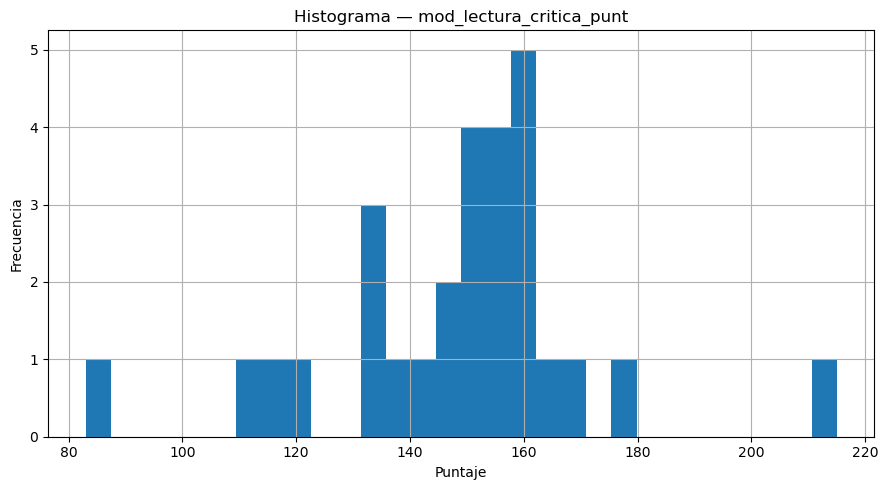

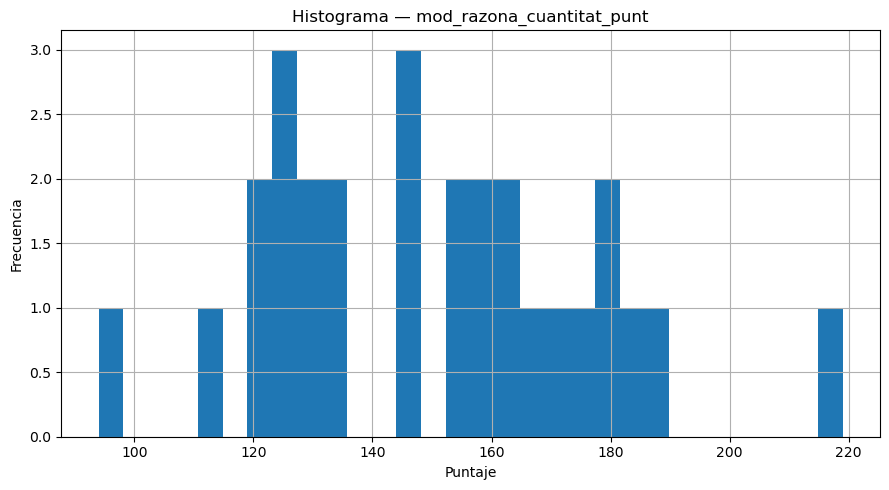

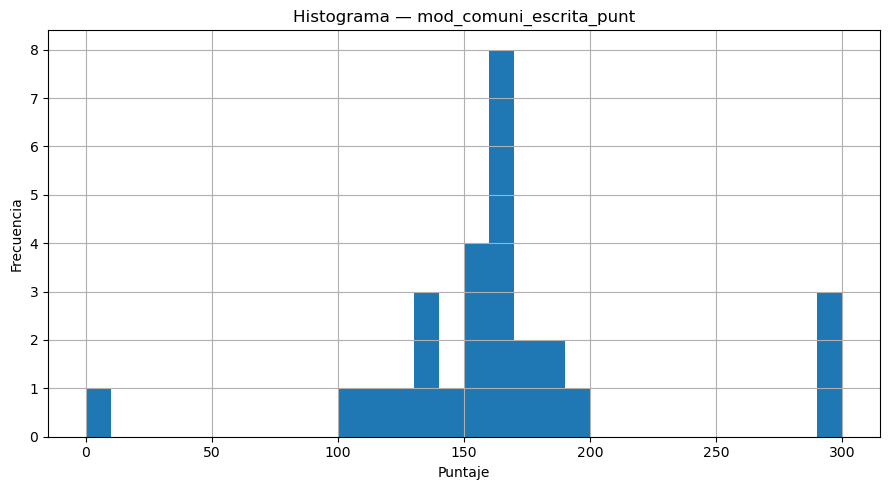

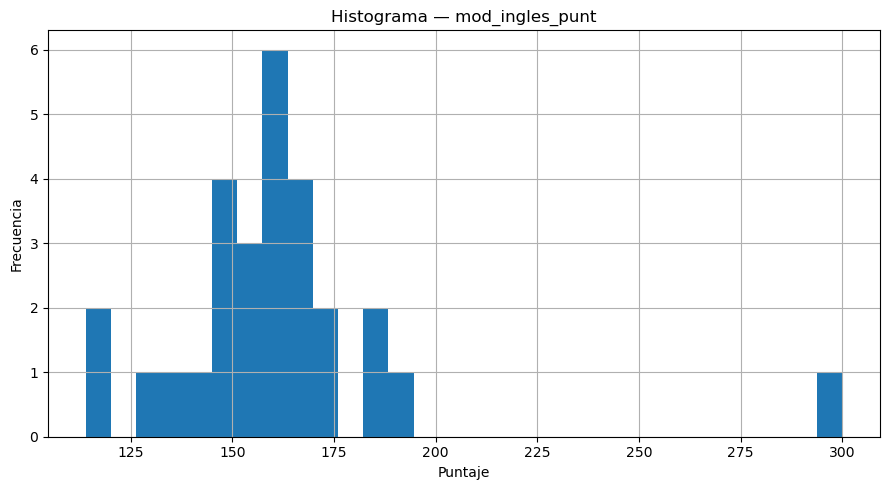

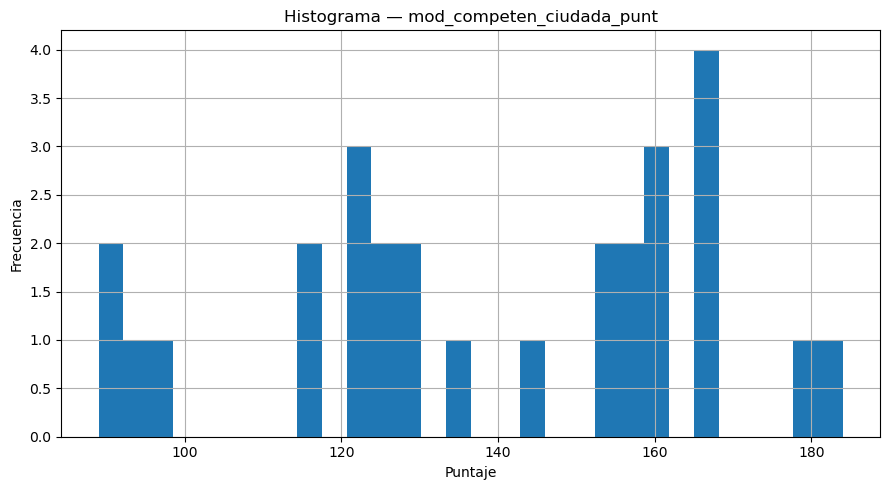

In [10]:

def hist_score(df_, col, title):
    if col in df_.columns and df_[col].notna().any():
        plt.figure()
        df_[col].dropna().plot(kind="hist", bins=30)
        plt.title(title)
        plt.xlabel("Puntaje")
        plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()

hist_score(df_mariana, "punt_global", "Histograma — Puntaje global")
for c in ["mod_lectura_critica_punt","mod_razona_cuantitat_punt","mod_comuni_escrita_punt",
          "mod_ingles_punt","mod_competen_ciudada_punt"]:
    hist_score(df_mariana, c, f"Histograma — {c}")

### Resultados — Histogramas de puntajes (Año 2023)

El **puntaje global** muestra una concentración clara entre los **140 y 160 puntos**, con mayor frecuencia en torno a los 150. Esto refleja que la mayoría de los estudiantes se ubican en un rango medio, aunque se observan casos aislados con puntajes bajos cercanos a 110 y otros muy altos superiores a 200.

En el módulo de **lectura crítica**, los puntajes se agrupan principalmente entre 140 y 160, con una mayor frecuencia cercana a los 155 puntos. Aunque existen algunos valores dispersos por debajo de 100 y por encima de 200, la distribución es relativamente homogénea en el rango medio.

En cuanto a **razonamiento cuantitativo**, los resultados presentan mayor dispersión, con un rango que va desde 90 hasta 200 puntos. La mayor parte de los estudiantes se concentra entre 130 y 170, con una tendencia hacia los 160 puntos, lo que sugiere un desempeño diverso en las competencias matemáticas.

La **comunicación escrita** vuelve a ser la prueba con mayor variabilidad: mientras la mayoría se ubica entre 130 y 190 puntos, también se observan valores extremos en 0 y 300. Esta amplitud indica fuertes desigualdades en el nivel de las competencias de redacción y argumentación.

En la prueba de **inglés**, los puntajes tienden a concentrarse en el rango de 140 a 170, con picos alrededor de los 160. Sin embargo, se identifican algunos valores atípicos, incluyendo desempeños muy altos que alcanzan los 300 puntos. Esto revela que, aunque la mayoría se encuentra en un nivel intermedio, un grupo reducido logra resultados sobresalientes.

Finalmente, en **competencias ciudadanas**, los resultados se concentran entre 120 y 170 puntos, con mayor frecuencia en torno a los 150-160. Se observan también algunos valores bajos cercanos a 80 y otros más altos cercanos a 180, lo que refleja variabilidad moderada en este módulo.

En síntesis, los histogramas del año 2023 confirman la tendencia de concentración en rangos medios en casi todas las áreas, pero también ponen en evidencia la persistencia de **valores extremos**, particularmente en comunicación escrita e inglés. Estos resultados sugieren que, si bien existe un desempeño relativamente estable en el promedio, las brechas de rendimiento entre los estudiantes siguen siendo significativas.



## 8) Exportación de datos limpios


In [11]:
from pathlib import Path

# Carpeta de salida
out_dir = Path(r"C:\Temp\spro_2020_tfm_outputs")
out_dir.mkdir(parents=True, exist_ok=True)

# Archivo destino
out_file = out_dir / "spro_mariana_sistemas_2020.csv"

# Guardar df_mariana directamente
df_mariana.to_csv(str(out_file), index=False, encoding="utf-8-sig")
print("✅ Guardado:", out_file)


✅ Guardado: C:\Temp\spro_2020_tfm_outputs\spro_mariana_sistemas_2020.csv


In [13]:
import re, unicodedata
import pandas as pd
from pathlib import Path

# --- helpers de limpieza robusta ---
def fix_mojibake(s):
    """Intenta corregir texto corrupto (utf8/latin1)."""
    if pd.isna(s): 
        return s
    s = str(s)
    # intento 1: típico latin1->utf8
    try:
        return s.encode('latin1').decode('utf-8')
    except Exception:
        pass
    return s

def deaccent_upper(s):
    if pd.isna(s): return s
    s = str(s).upper().strip()
    # quita diacríticos
    s = ''.join(c for c in unicodedata.normalize('NFD', s) 
                if unicodedata.category(c) != 'Mn')
    # colapsa espacios
    s = ' '.join(s.split())
    return s

def clean_depto(s):
    """Normaliza departamento; repara variantes de NARIÑO."""
    if pd.isna(s): return s
    s0 = fix_mojibake(s)
    s1 = deaccent_upper(s0)  # NARIÑO -> NARINO
    # repara casos 'NARIA?O' (carácter raro entre A y O)
    if re.fullmatch(r'NARIA\W?O', s1):
        return 'NARINO'
    # algunos datasets dejan basura no ASCII; homologa
    if s1 in {'NARINO','NARIN0','NARINÓ','NARINÒ','NARIÑO'}:
        return 'NARINO'
    return s1

# --- aplica limpieza a tu dataframe de SPro ---
col_depto = 'estu_inst_departamento'  # ajústalo si tu col cambia
df[col_depto + '_clean'] = df[col_depto].map(clean_depto)

print("Únicos antes:", df[col_depto].dropna().astype(str).str.upper().unique()[:10])
print("Únicos después:", df[col_depto + '_clean'].dropna().unique()[:10])

# --- filtra todos los de Nariño ---
mask_narino = df[col_depto + '_clean'].eq('NARINO')
df_narino = df.loc[mask_narino].copy()
print("Filas Nariño:", len(df_narino))


out_dir = Path(r"C:\Temp\spro_2020_tfm_outputs")
out_dir.mkdir(parents=True, exist_ok=True)

# 1) TODOS Nariño
out_file_nar = out_dir / "spro_narino_2023.csv"
df_narino.to_csv(str(out_file_nar), index=False, encoding="utf-8-sig")
print("✅ Guardado Nariño:", out_file_nar)



Únicos antes: ['TOLIMA' 'BOGOTA\x81' 'QUINDIO' 'ANTIOQUIA' 'CALDAS' 'MAGDALENA'
 'ATLANTICO' 'BOYACA' 'CORDOBA' 'NAN']
Únicos después: ['TOLIMA' 'BOGOTA\x81' 'QUINDIO' 'ANTIOQUIA' 'CALDAS' 'MAGDALENA'
 'ATLANTICO' 'BOYACA' 'CORDOBA' 'NAN']
Filas Nariño: 4513
✅ Guardado Nariño: C:\Temp\spro_2020_tfm_outputs\spro_narino_2023.csv



### Conexión con VA/CR
Este dataset representa la **línea de salida** del programa. Al cruzarlo con Saber 11 (línea de entrada), se calcularán el **Valor Agregado** y la **Contribución Relativa**, controlando por variables sociodemográficas y académicas.
